In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Histogram

Consider the insurance dataset.
  * It has records on the relationship between personal attributes (age, gender, BMI: body mass index, family size, smoking habits), geographic factors, and their impact on medical insurance charges

In [5]:
df = pd.read_csv('insurance.csv')
df = df.sample(n=100, random_state=6)
df['children'] = df['children'].astype('str')
df.head(3)

,age,sex,bmi,children,smoker,region,expenses
811,33,female,42.9,3,no,northwest,6360.99
973,19,female,40.5,0,no,southwest,1759.34
308,58,male,34.9,0,no,northeast,11944.59


We will set the theme to `'whitegrid'` and draw a histogram with sns.histplot(). The documentation function is found [here](https://seaborn.pydata.org/generated/seaborn.histplot.html)
* The arguments are data, where you parse your dataset, and x, where you parse the variable you are interested in drawing.

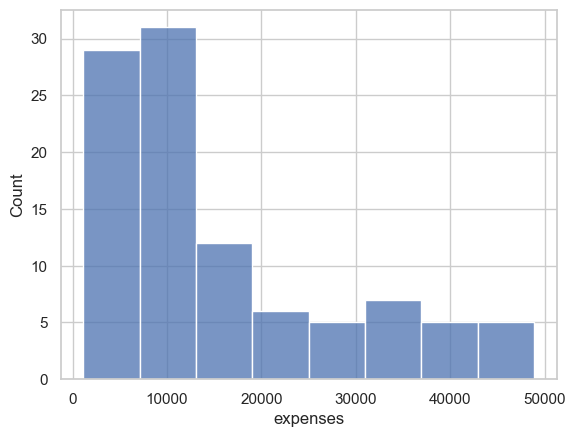

In [9]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x='expenses')
plt.show()

If you want to have more than one variable in your plot, you can subset the variables and parse at `data` argument
* In this case, we used bracket notation to subset `['age','bmi']`.

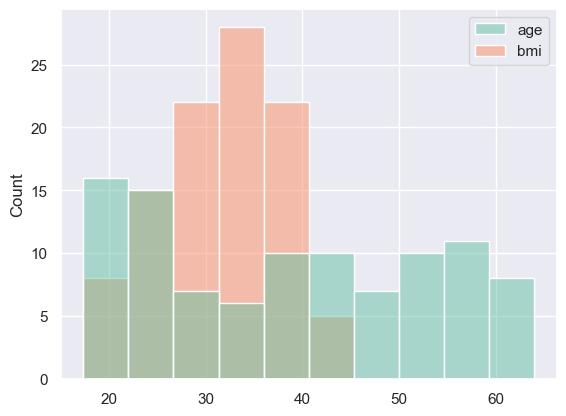

In [16]:
sns.set_theme(style="whitegrid")
sns.set_theme(palette="Set2")
sns.histplot(data=df[['age','bmi']])
plt.show()

You can add a kde line to the histogram by adding the argument `kde=True`

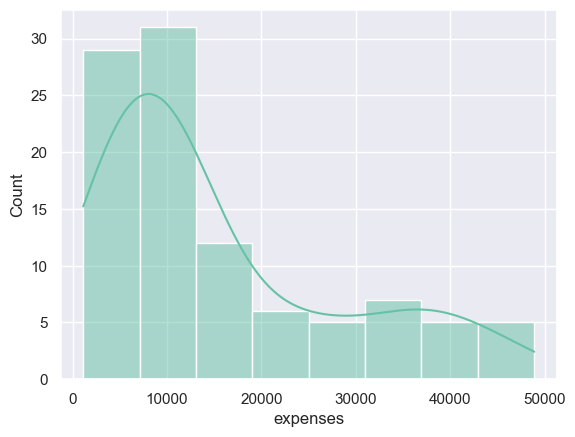

In [21]:
sns.histplot(data=df, kde=True, x='expenses')
plt.show()

You can understand the distribution of a given category by adding the argument ``hue`` 
* In this case, we want to know charges distribution per smoking status.
* The most frequent levels from non-smokers look different from the smokers. We notice the distribution shape of non-smokers is tighter and centred at a lower medical insurance charge. 

### Distplot

The distplot is used for visualising the distribution of a univariate set of observations. This function combines the functionality of a histogram and a kernel density estimate (KDE) plot. 
* **When to Use:** It's ideal for when you need a quick way to see the distribution of data or when you want to compare the distribution of a dataset to a normal distribution. The histogram shows the frequency of data intervals, while the KDE provides a smooth estimate of the distribution.
* **Example Application:** Analyzing the distribution of a continuous variable.

This function is a Figure-level function. This functionality plots histograms but with the ability to facet histograms by subsets. The documentation function is found [here](https://seaborn.pydata.org/generated/seaborn.displot.html)
* The arguments for the plot below are similar to the previous section: data and x
* Let's consider the same dataset from before

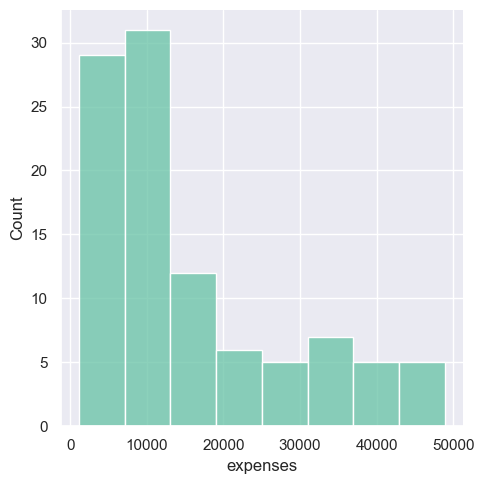

In [28]:
sns.displot(data=df, x="expenses")
plt.show()

Now we add a ``col`` argument. It will plot on different column facets according to the variable, in this case, smoker

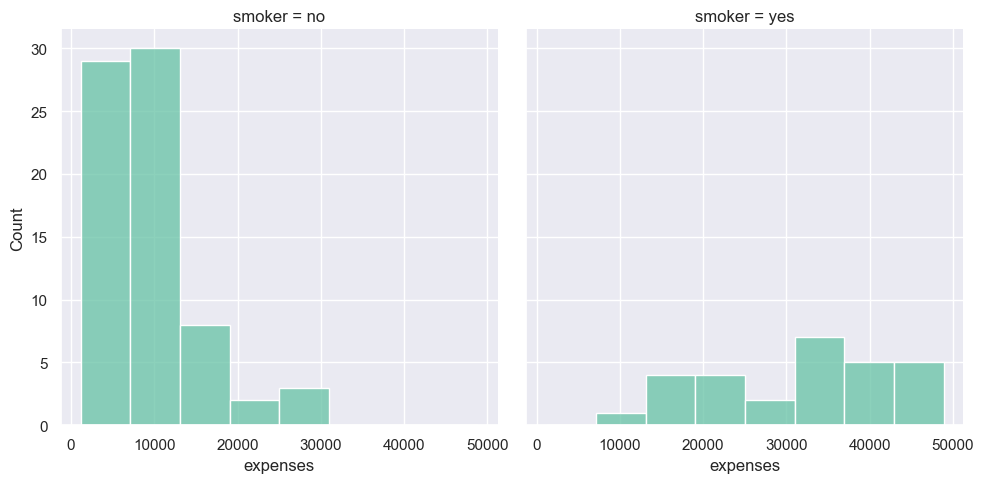

In [33]:
sns.displot(df, x="expenses", col="smoker")
plt.show()

We can add ``row`` argument and facet by sex

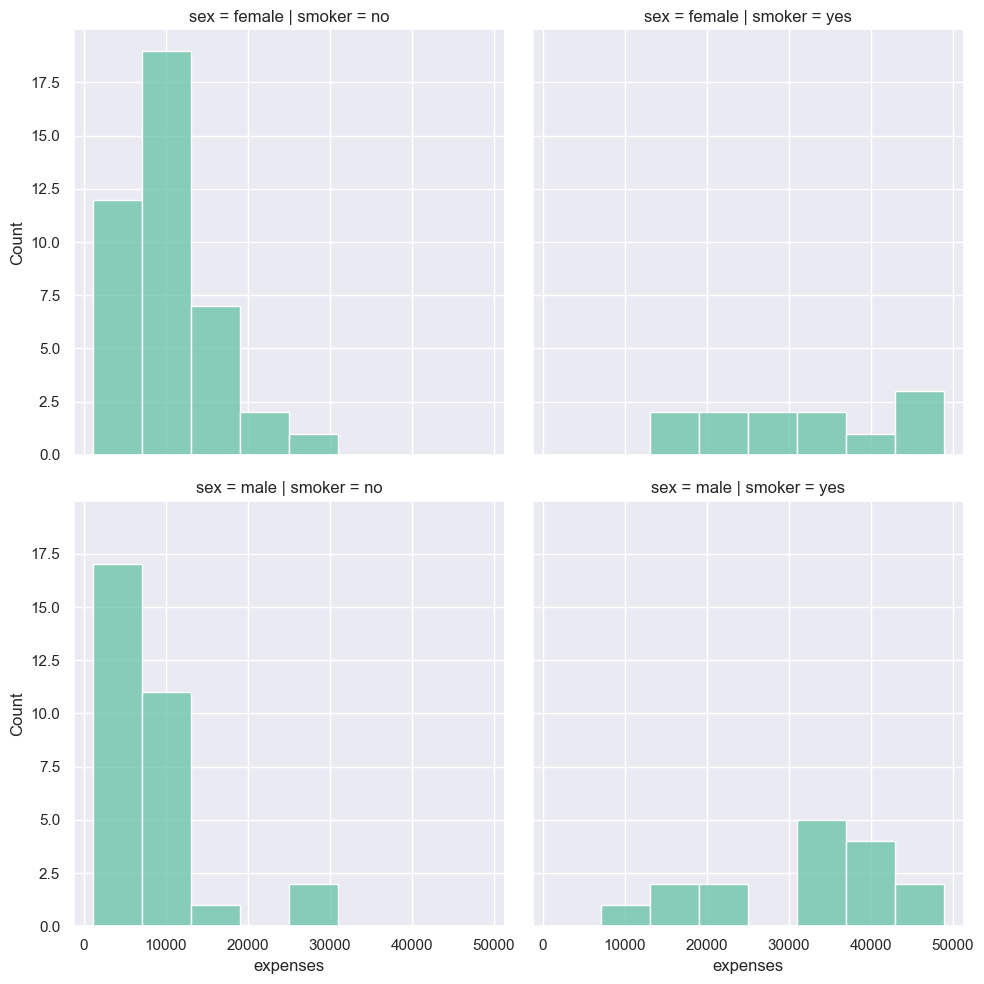

In [38]:
 sns.displot(df, x="expenses", col="smoker", row="sex")
 plt.show()

In addition, we can add ``hue`` and check the distribution per region. 
* We see that males and females, smokers and non-smokers, are presented in all regions. Also, note the distribution difference between smokers and non-smokers.

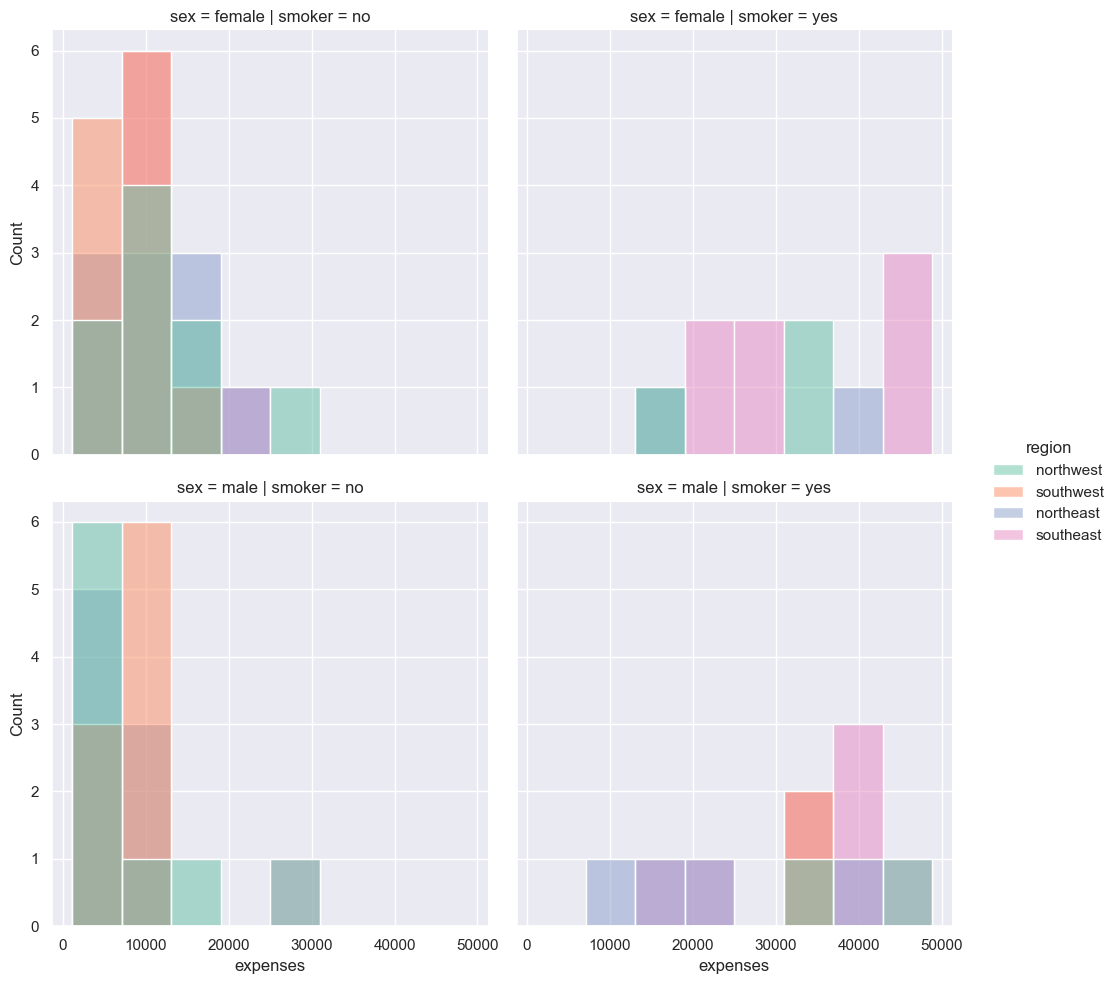

In [43]:
sns.displot(df, x="expenses", col="smoker", row="sex", hue='region')
plt.show()

In [45]:
df_practice = sns.load_dataset('tips')
df_practice = df_practice.sample(n=50, random_state=1)
df_practice.head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3


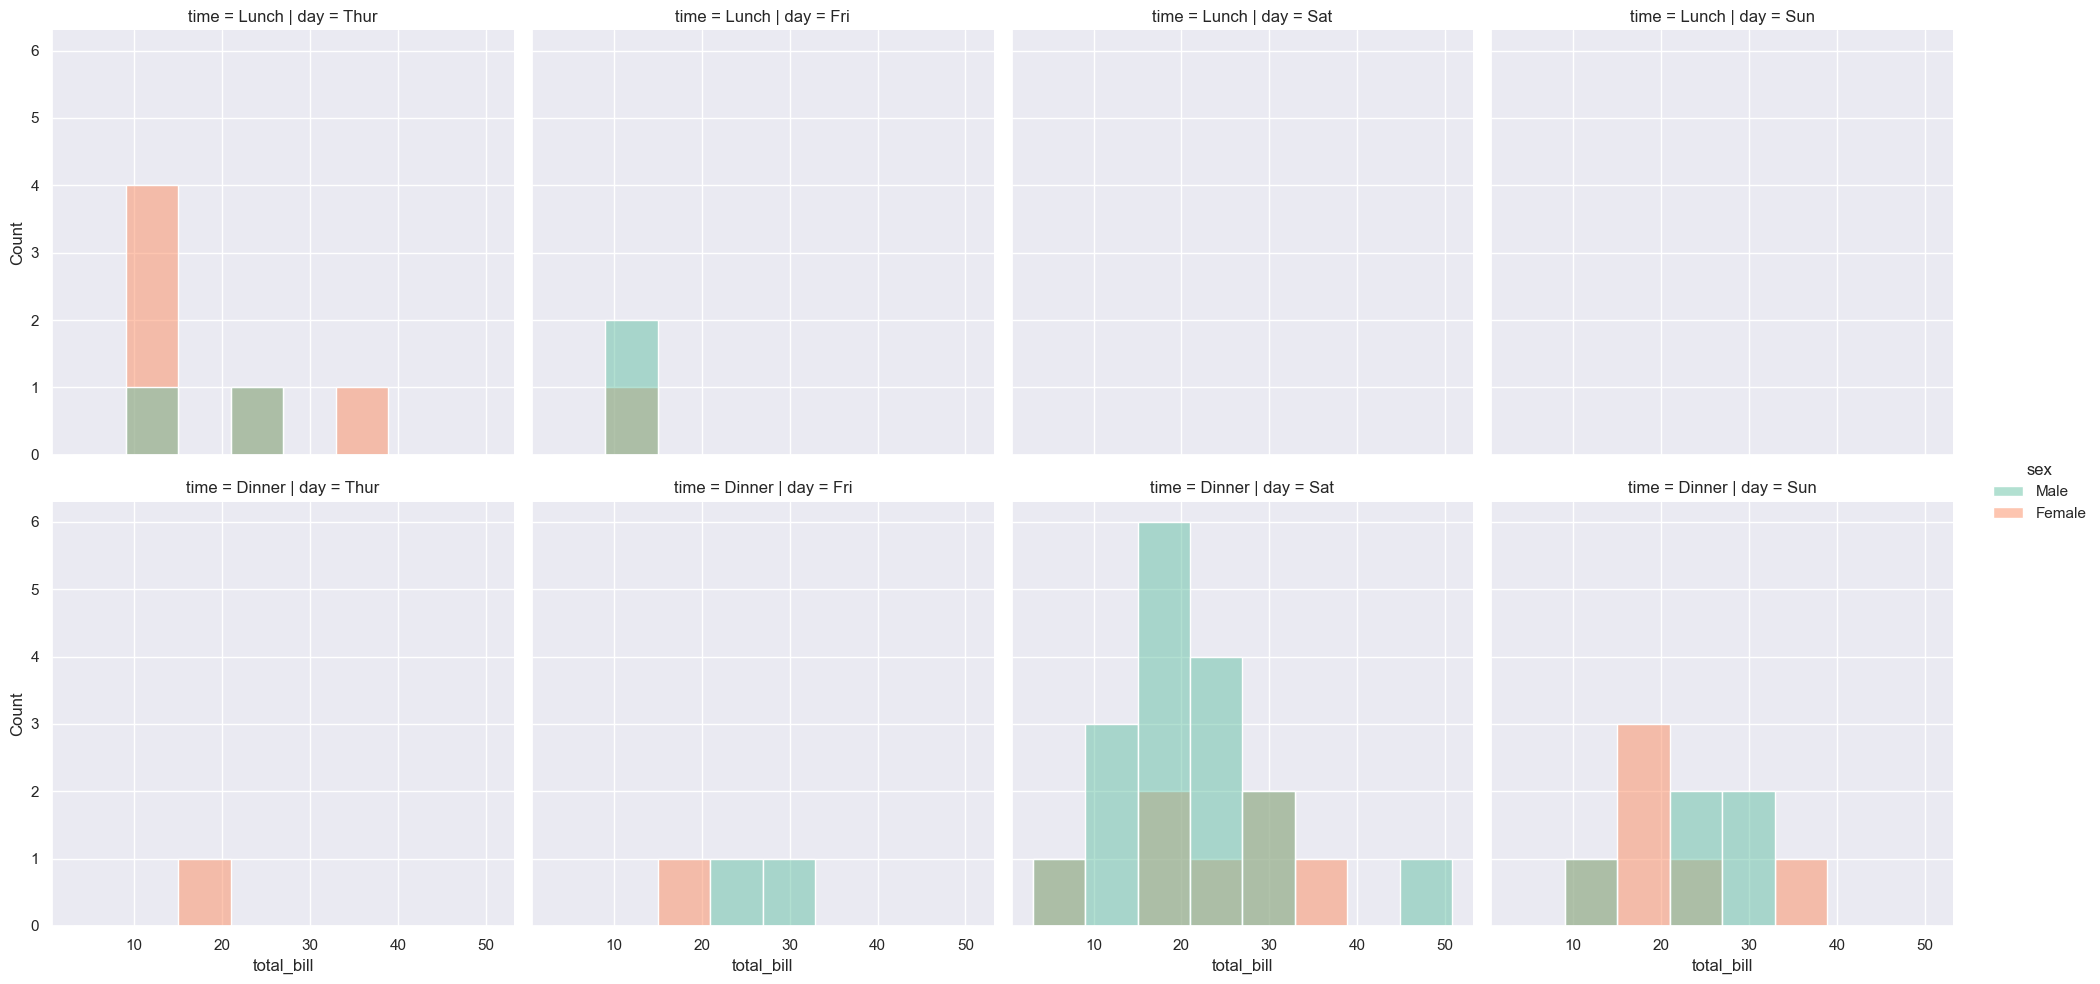

In [49]:
sns.displot(df_practice, x='total_bill', col='day', row='time', hue='sex')
plt.show()

### KDE

**Use Case:** kdeplot is used for visualising the data distribution through its continuous probability density curve. It is useful for seeing the shape of the data distribution.

* **When to Use:** It is particularly useful when you need a clear and concise representation of the distribution shape, want to compare two distributions, or need to overlay the density plots of multiple samples.
* **Example Application:** Useful in finance for risk management by examining the distribution of investment returns, or in any field to compare distributions of two variables, such as before and after experimental interventions.

In [52]:
df = sns.load_dataset('tips')
df = df.sample(n=50, random_state=1)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3


As we studied in the previous lesson, A kde plot represents the distribution of a numeric variable.
* It plots the data using a density probability curve; therefore, the y-axis is called density. You will be interested in checking in which range the distribution is denser and its shape.
* kde draws a more interpretable plot than a histogram. It doesn't need a bin argument since it automatically determines bandwidth.

We use `sns.kdeplot()`; the documentation is [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). We parse the data by filtering the variables we are interested in. We add ``fill=True``, so the area under the line is coloured.
* As we expect, there is a difference between levels of tip and total_bill. Tips stay in the range of 0 to 10 and total_bill up to 50; the majority seem to be between 10 and 25.

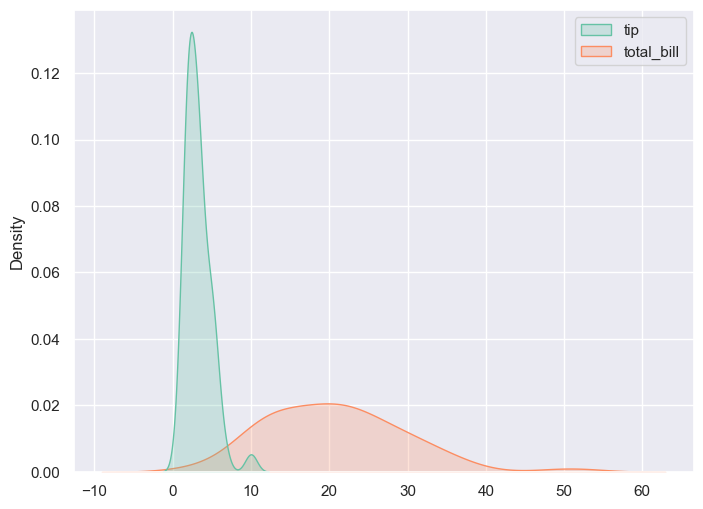

In [61]:
fig,ax = plt.subplots(figsize = (8,6))
sns.kdeplot(data=df.filter(['tip','total_bill'], axis=1), fill=True)
plt.show()

This function is an Axes level function since it has ``ax`` as an argument
* We create 4 plots wth `plt.subplots()`.
  * Then we draw an individual kde plot for the tip, colouring by a given variable: sex, time, day, size
  * We added ``palette='Set1'`` to help to distinguish the different category levels. Once again, we use the matplotlib [palette](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

* We note more males than females (since the blue curve has a higher density than the orange). The tip levels between males and females look to have a similar shape
* We note more dinner in the dataset. It looks like there are higher tips at dinner than lunch
* We note only a few Sunday meals. The tip levels across days look to have similar range levels, even though they have slightly different shapes and Sunday tips seem to be higher on average than on other days.
* We note that tables of 2 are the most common. Tables with more people tend to offer more tips.

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_17526/2280127917.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='tip',hue='size',ax=axes[1,1],fill=True, palette='Set1')


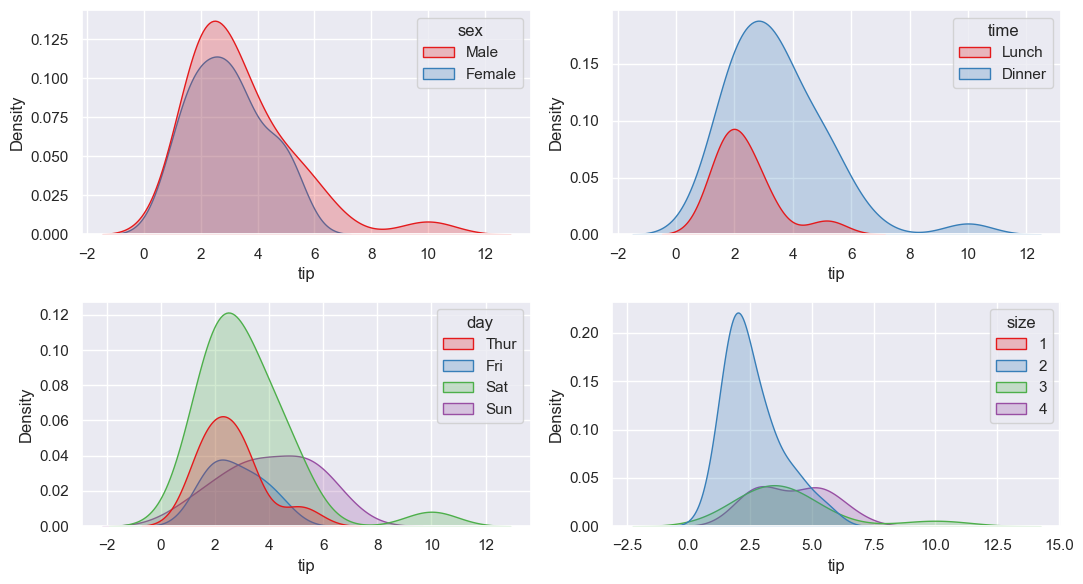

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize =(11,6))

sns.kdeplot(data=df, x='tip',hue='sex',ax=axes[0,0],fill=True,  palette='Set1')
sns.kdeplot(data=df, x='tip',hue='time',ax=axes[0,1],fill=True,  palette='Set1')
sns.kdeplot(data=df, x='tip',hue='day',ax=axes[1,0],fill=True,  palette='Set1')
sns.kdeplot(data=df, x='tip',hue='size',ax=axes[1,1],fill=True, palette='Set1')

plt.tight_layout()
plt.show()

In [84]:
df_practice = pd.read_csv('insurance.csv')
df_practice = df_practice.sample(n=50, random_state=1)
df_practice['children'] = df_practice['children'].astype('str')
df_practice.head(3)

,age,sex,bmi,children,smoker,region,expenses
559,19,male,35.5,0,no,northwest,1646.43
1087,57,male,31.5,0,no,northwest,11353.23
1020,51,male,37.0,0,no,southwest,8798.59


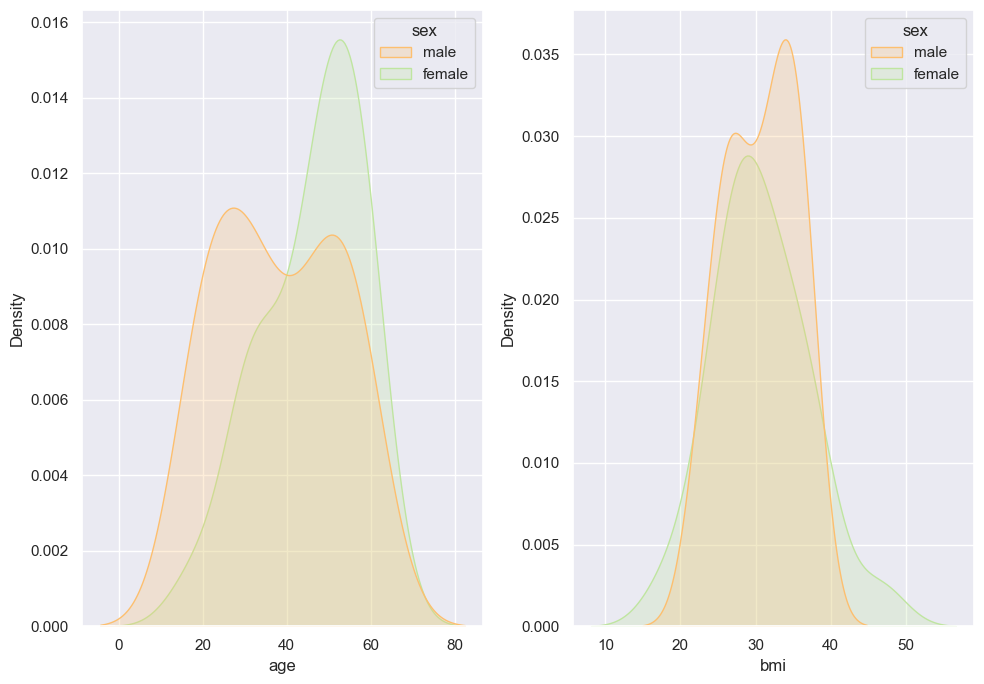

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,7))

sns.kdeplot(data=df_practice, x='age', hue='sex', ax=axes[0], fill=True, palette='Spectral')
sns.kdeplot(data=df_practice, x='bmi', hue='sex', ax=axes[1], fill=True, palette='Spectral')

plt.tight_layout()
plt.show()

### Boxplot

We can create a boxplot with `sns.boxplot()`. The documentation is [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html). This function is an Axes level function
* If you parse the DataFrame as the ``data`` argument, it will plot all numerical columns as categories.
  * We know in practical terms that ``size`` reflects a categorical ordinal variable, but in this dataset, its data type is an integer. That is the reason it is being shown in the boxplot. This is fine; we need to be aware of that when interpreting

In [93]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


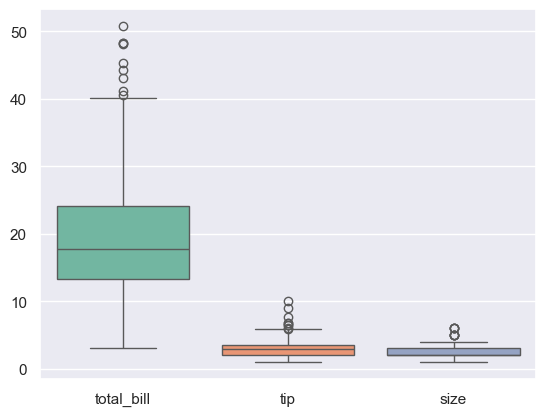

In [95]:
sns.boxplot(data=df)
plt.show()

Another approach is to set x as the categorical variable to inspect the levels across and y as the numerical variable that we want to assess the distribution

* We note that the IQR (the range where the levels are more frequent) are higher for sizes 4, 5 and 6. Size 6 has less variability, so the waiter would prefer to come to a table with more people.

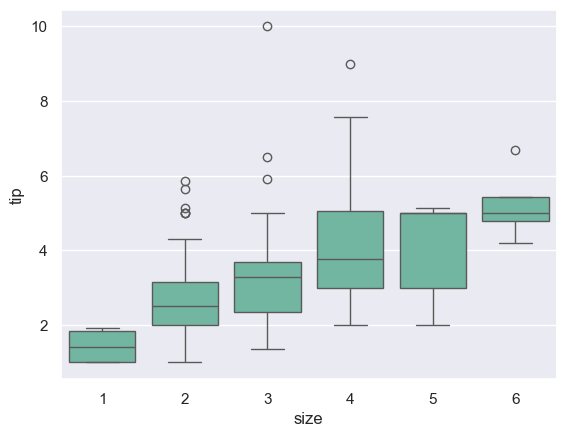

In [98]:
sns.boxplot(data=df, x='size', y='tip')
plt.show()

We can draw a grouped boxplot by adding ``hue``, which will be categorical data
* We notice that a table of 6 typically happens at lunch, and a table of 5 happens at dinner

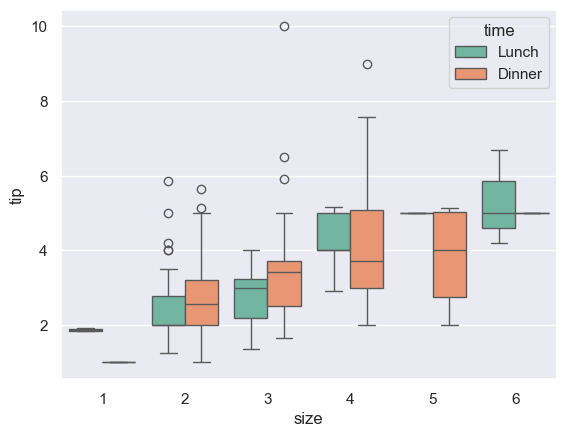

In [106]:
sns.boxplot(data=df, x="size", y="tip", hue="time")
plt.show()

In [109]:
df_practice = pd.read_csv('insurance.csv')
df_practice = df_practice.sample(n=50, random_state=1)
df_practice['children'] = df_practice['children'].astype('str')
df_practice.head(3)

,age,sex,bmi,children,smoker,region,expenses
559,19,male,35.5,0,no,northwest,1646.43
1087,57,male,31.5,0,no,northwest,11353.23
1020,51,male,37.0,0,no,southwest,8798.59


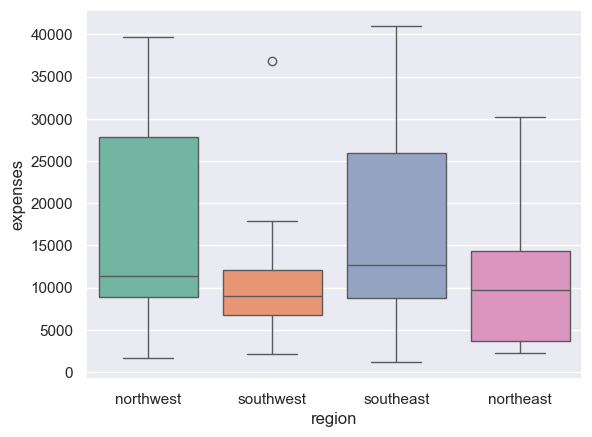

In [113]:
sns.boxplot(data=df_practice, x='region', y='expenses', hue='region')
plt.show()

### Swarm Plot

Swarmplot is like a scatterplot for categorical variables and is an enhancement over traditional box plots and violin plots by showing the actual data points. Each point on the swarm plot represents an individual observation.
* This plot helps to give a better representation of the distribution of values. However, it does not scale well enough for large numbers of data points. It effectively complements a boxplot when you want to show all observations. This plot is great for highlighting multiple distributions and their discrepancies. The documentation is found [here](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

* The arguments are ``data``, ``x`` and ``y``: you can interpret them similarly to the boxplot.
* You will notice that tables with sizes 1, 5 and 6 are atypical. So don't get high expectations of getting tables of 5 or 6.

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


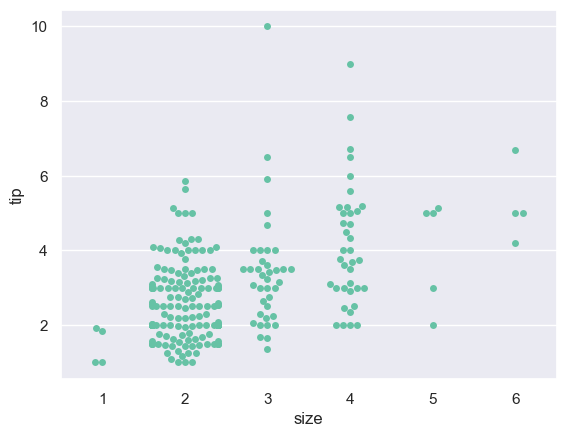

In [116]:
sns.swarmplot(data=df, x='size', y='tip')
plt.show()

We can draw a grouped swarmplot by adding the parameter hue, which will be categorical data. We add ``dodge=True``, so the dots will not be cluttered

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


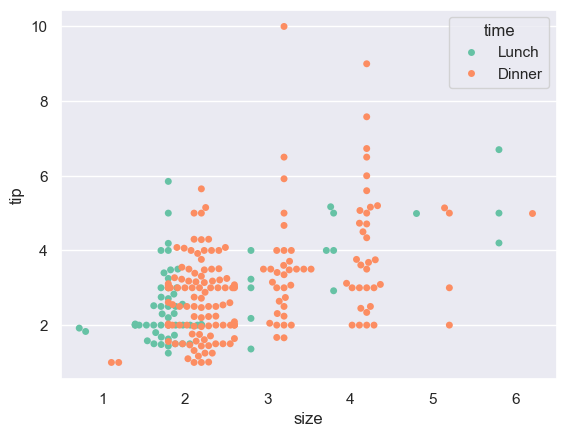

In [119]:
sns.swarmplot(data=df, x='size', y='tip', hue='time', dodge=True)
plt.show()

You can combine a boxplot and a swarmplot in your analysis. The benefit you take from a boxplot is to assess the distribution levels. The benefit you get from a swarmplot is to understand how frequent the levels are.
* In this example, we create a figure with plt.subplots() with 1 row and 2 columns, then place a boxplot and swarmplot side by side

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


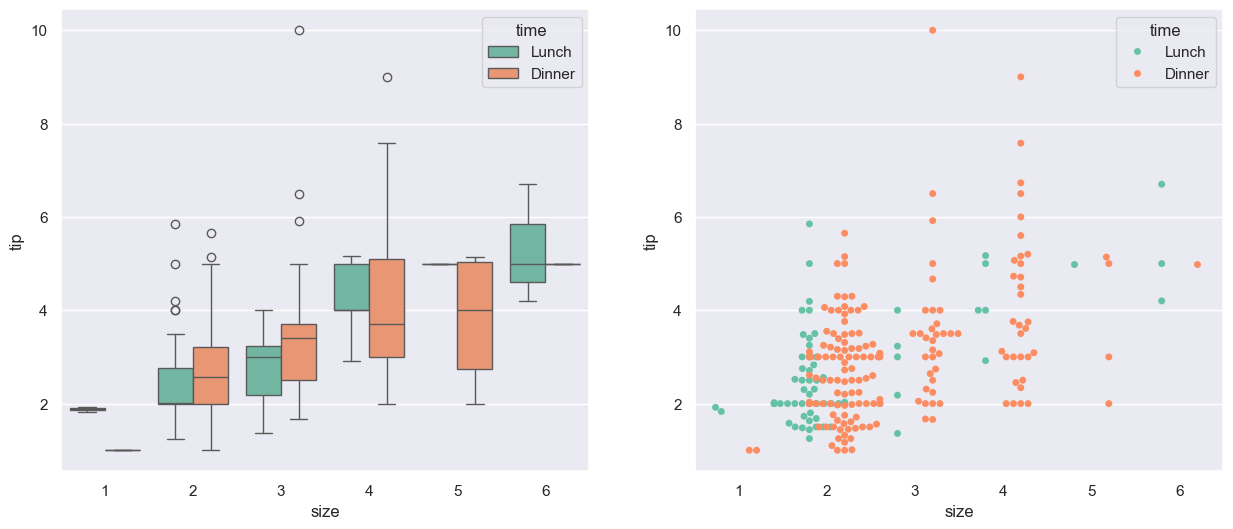

In [144]:
x, y, hue = 'size', 'tip', 'time'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.boxplot(data=df, x=x, y=y, hue=hue, ax=axes[0])
sns.swarmplot(data=df, x=x, y=y, hue=hue, dodge=True, ax=axes[1])
plt.show()

In [132]:
df_practice = pd.read_csv('insurance.csv')
df_practice = df_practice.sample(n=100, random_state=1)
df_practice.head(3)

,age,sex,bmi,children,smoker,region,expenses
559,19,male,35.5,0,no,northwest,1646.43
1087,57,male,31.5,0,no,northwest,11353.23
1020,51,male,37.0,0,no,southwest,8798.59


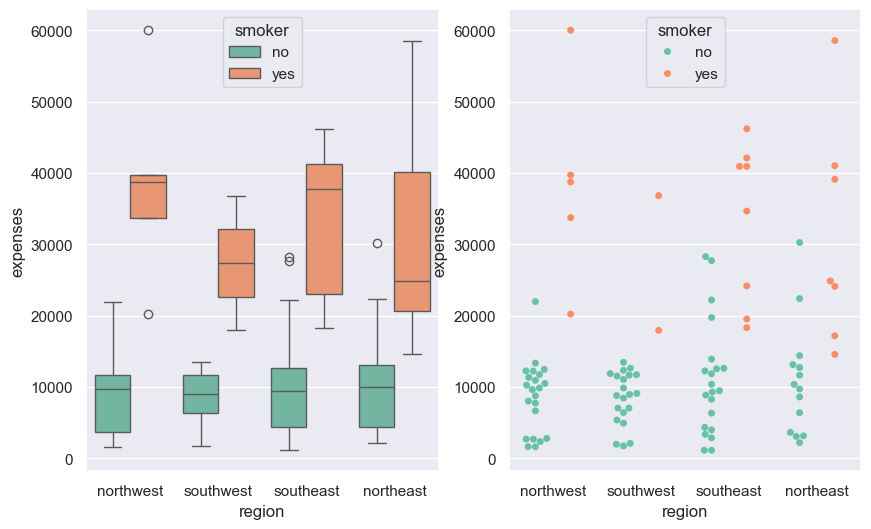

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

sns.boxplot(data=df_practice, x='region', y='expenses', ax=axes[0], hue='smoker')
sns.swarmplot(data=df_practice, x='region', y='expenses', ax=axes[1], dodge=True, hue='smoker')

plt.show()